# Install Necessary Libraries

In [2]:
# !pip install requests

# Import Libraries

In [3]:
import requests
import json
import csv

In [4]:
def fetch_and_flatten_data(api_url):
    response = requests.get(api_url)

    if response.status_code == 200:
        data = response.json()
        flattened_data = flatten_json(data)
        return flattened_data
    else:
        print(f"Error fetching data. Status code: {response.status_code}")
        return None


def flatten_json(data, parent_key='', sep='_'):
    flattened_data = {}

    for k, v in data.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k

        if isinstance(v, dict):
            flattened_data.update(flatten_json(v, new_key, sep=sep))
        else:
            flattened_data[new_key] = v

    return flattened_data


def write_to_csv(data, csv_file):
    with open(csv_file, 'w', newline='') as csvfile:
        fieldnames = data.keys()
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        writer.writerow(data)


def main():
    api_url = "https://api.coindesk.com/v1/bpi/currentprice.json"
    flattened_data = fetch_and_flatten_data(api_url)

    if flattened_data:
        csv_file = "coindesk_data.csv"
        write_to_csv(flattened_data, csv_file)
        print(f"Data successfully written to {csv_file}")


if __name__ == "__main__":
    main()

Data successfully written to coindesk_data.csv


# Analysis of Data

In [7]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
csv_file = "coindesk_data.csv"
df = pd.read_csv(csv_file)
df

,time_updated,time_updatedISO,time_updateduk,disclaimer,chartName,bpi_USD_code,bpi_USD_symbol,bpi_USD_rate,bpi_USD_description,bpi_USD_rate_float,bpi_GBP_code,bpi_GBP_symbol,bpi_GBP_rate,bpi_GBP_description,bpi_GBP_rate_float,bpi_EUR_code,bpi_EUR_symbol,bpi_EUR_rate,bpi_EUR_description,bpi_EUR_rate_float
0,"Jan 21, 2024 05:11:36 UTC",2024-01-21T05:11:36+00:00,"Jan 21, 2024 at 05:11 GMT",This data was produced from the CoinDesk Bitco...,Bitcoin,USD,&#36;,"41,719.109",United States Dollar,41719.1089,GBP,&pound;,"32,839.363",British Pound Sterling,32839.3634,EUR,&euro;,"38,258.509",Euro,38258.5088


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time_updated         1 non-null      object 
 1   time_updatedISO      1 non-null      object 
 2   time_updateduk       1 non-null      object 
 3   disclaimer           1 non-null      object 
 4   chartName            1 non-null      object 
 5   bpi_USD_code         1 non-null      object 
 6   bpi_USD_symbol       1 non-null      object 
 7   bpi_USD_rate         1 non-null      float64
 8   bpi_USD_description  1 non-null      object 
 9   bpi_USD_rate_float   1 non-null      float64
 10  bpi_GBP_code         1 non-null      object 
 11  bpi_GBP_symbol       1 non-null      object 
 12  bpi_GBP_rate         1 non-null      float64
 13  bpi_GBP_description  1 non-null      object 
 14  bpi_GBP_rate_float   1 non-null      float64
 15  bpi_EUR_code         1 non-null      object 

In [18]:
df.describe()

,bpi_USD_rate,bpi_USD_rate_float,bpi_GBP_rate,bpi_GBP_rate_float,bpi_EUR_rate,bpi_EUR_rate_float
count,1.000,1.0000,1.000,1.0000,1.000,1.0000
mean,41719.109,41719.1089,32839.363,32839.3634,38258.509,38258.5088
std,NaN,NaN,NaN,NaN,NaN,NaN
min,41719.109,41719.1089,32839.363,32839.3634,38258.509,38258.5088
25%,41719.109,41719.1089,32839.363,32839.3634,38258.509,38258.5088
50%,41719.109,41719.1089,32839.363,32839.3634,38258.509,38258.5088
75%,41719.109,41719.1089,32839.363,32839.3634,38258.509,38258.5088
max,41719.109,41719.1089,32839.363,32839.3634,38258.509,38258.5088


In [19]:
df.isna().sum()

time_updated           0
time_updatedISO        0
time_updateduk         0
disclaimer             0
chartName              0
bpi_USD_code           0
bpi_USD_symbol         0
bpi_USD_rate           0
bpi_USD_description    0
bpi_USD_rate_float     0
bpi_GBP_code           0
bpi_GBP_symbol         0
bpi_GBP_rate           0
bpi_GBP_description    0
bpi_GBP_rate_float     0
bpi_EUR_code           0
bpi_EUR_symbol         0
bpi_EUR_rate           0
bpi_EUR_description    0
bpi_EUR_rate_float     0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [12]:
import pandas as pd

# Create a DataFrame from the sample data
df = pd.DataFrame(df)

# Convert 'rate' columns to numeric values and replace symbols
rate_columns = ['bpi_USD_rate', 'bpi_GBP_rate', 'bpi_EUR_rate']
for column in rate_columns:
    df[column] = df[column].replace({',': ''}, regex=True).astype(float)

symbol_columns = ['bpi_USD_symbol', 'bpi_GBP_symbol', 'bpi_EUR_symbol']
for column in symbol_columns:
    df[column] = df[column].replace({'&#36;': '$', '&pound;': '£', '&euro;': '€'})

# Display the DataFrame
print(df)

# Perform basic analysis
average_rate_usd = df['bpi_USD_rate_float'].mean()
max_rate_gbp = df['bpi_GBP_rate_float'].max()

print(f"\nAverage USD Rate: {average_rate_usd}")
print(f"Max GBP Rate: {max_rate_gbp}")


                time_updated            time_updatedISO  \
0  Jan 21, 2024 05:11:36 UTC  2024-01-21T05:11:36+00:00   

              time_updateduk  \
0  Jan 21, 2024 at 05:11 GMT   

                                          disclaimer chartName bpi_USD_code  \
0  This data was produced from the CoinDesk Bitco...   Bitcoin          USD   

  bpi_USD_symbol  bpi_USD_rate   bpi_USD_description  bpi_USD_rate_float  \
0              $     41719.109  United States Dollar          41719.1089   

  bpi_GBP_code bpi_GBP_symbol  bpi_GBP_rate     bpi_GBP_description  \
0          GBP              £     32839.363  British Pound Sterling   

   bpi_GBP_rate_float bpi_EUR_code bpi_EUR_symbol  bpi_EUR_rate  \
0          32839.3634          EUR              €     38258.509   

  bpi_EUR_description  bpi_EUR_rate_float  
0                Euro          38258.5088  

Average USD Rate: 41719.1089
Max GBP Rate: 32839.3634


In [14]:
# 1. Display basic statistics of the numeric columns
numeric_columns = ['bpi_USD_rate_float', 'bpi_GBP_rate_float', 'bpi_EUR_rate_float']
numeric_stats = df[numeric_columns].describe()
numeric_stats

,bpi_USD_rate_float,bpi_GBP_rate_float,bpi_EUR_rate_float
count,1.0000,1.0000,1.0000
mean,41719.1089,32839.3634,38258.5088
std,NaN,NaN,NaN
min,41719.1089,32839.3634,38258.5088
25%,41719.1089,32839.3634,38258.5088
50%,41719.1089,32839.3634,38258.5088
75%,41719.1089,32839.3634,38258.5088
max,41719.1089,32839.3634,38258.5088


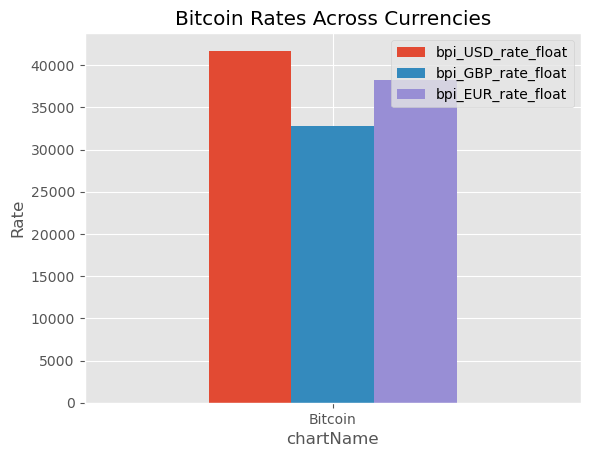

In [16]:
# 3. Visualize the rates using a bar plot
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('ggplot')

# Plotting
df.plot(kind='bar', x='Currency', y=['bpi_USD_rate_float', 'bpi_GBP_rate_float', 'bpi_EUR_rate_float'],
        title='Bitcoin Rates Across Currencies', ylabel='Rate', rot=0)
plt.show()

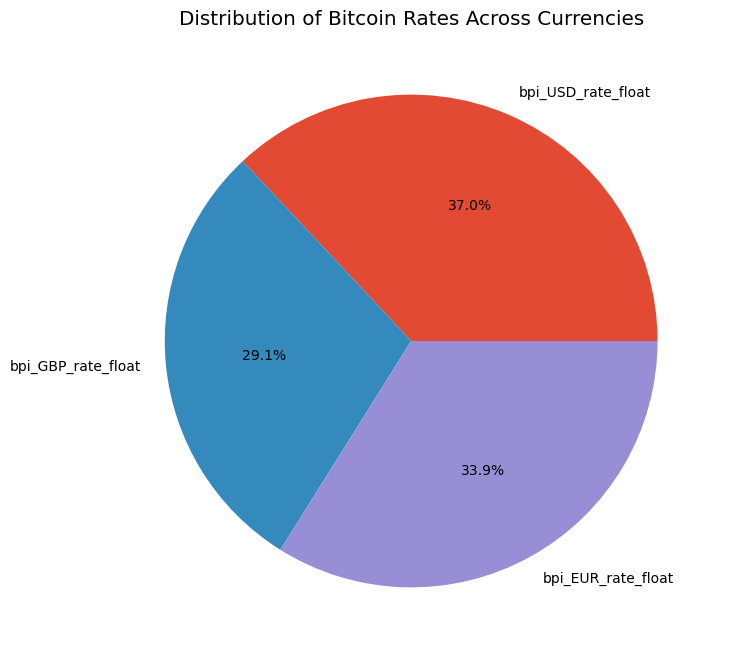

In [28]:
# 7. Pie Chart to Show Distribution of Rates in USD, GBP, and EUR
total_rates = df[['bpi_USD_rate_float', 'bpi_GBP_rate_float', 'bpi_EUR_rate_float']].sum()
total_rates.plot(kind='pie', autopct='%1.1f%%', labels=total_rates.index, figsize=(8, 8), title='Distribution of Bitcoin Rates Across Currencies')
plt.show()

# Thank You!